# Interpolation using the RBF method

In [1]:
# Set up the domain and create the cartesian node distribution - RBF centers

# Domain is [-2,2] X [-2,2] = [a,b] X [c,d]
a=-2;
b=2;
c=-2;
d=2;

Nx=100; # Number of nodes on the x axis 
Ny=100; # Number of nodes on the y axis 

import numpy as np

# Line space
x1=np.linspace(a,b,Nx);
y1=np.linspace(c,d,Ny);

#x1.shape :- to get the size of the vector

xd, yd = np.meshgrid(x1, y1);

# Nodes (x,y)
x=xd.flatten('F');
y=yd.flatten('F');

# If you want to look at the node distribution uncomment the following 4 commands
#import matplotlib.pyplot as plt
#plt.rcParams["figure.figsize"] = (20,20)
#plt.plot(x,y,'.')
#plt.show()


## Define the radial basis functions

In [2]:
import math

def phi(X1,X2,Y1,Y2,epsil):
    return np.exp(-(epsil**2)*(np.power(X1-X2,2)+np.power(Y1-Y2,2)))

# Derivative with respective to x of phi
def phi_x(X1,X2,Y1,Y2,epsil):
    return 2*epsil**2*np.multiply((X1-X2),np.exp(-(epsil**2)*(np.power(X1-X2,2)+np.power(Y1-Y2,2))))

# Derivative with respective to y of phi
def phi_y(X1,X2,Y1,Y2,epsil):
    return 2*epsil**2*np.multiply((Y1-Y2),np.exp(-(epsil**2)*(np.power(X1-X2,2)+np.power(Y1-Y2,2))))

# Laplacian of phi
def phi_lap(X1,X2,Y1,Y2,epsil):
    return -4*epsil**2*np.exp(-(epsil**2)*(np.power(X1-X2,2)+np.power(Y1-Y2,2)))+4*epsil**2*np.multiply((np.power(X1-X2,2)+np.power(Y1-Y2,2)),np.exp(-(epsil**2)*(np.power(X1-X2,2)+np.power(Y1-Y2,2))))


## Some Parameters

In [3]:
N=x.shape[0]; # Number of total nodes
epsil=2; # Shape parameter - epsilon

# Function that we interpolate
def f(x,y):
    return np.multiply(x,np.exp(-np.power(x,2)-np.power(y,2)))


## Evaluation Points

In [4]:

#Line space
x3=np.linspace(a,b,Nx//2);
y3=np.linspace(c,d,Ny//2);

#x1.shape :- to get the size of the vector

xd1, yd1 = np.meshgrid(x3, y3);

# Nodes (x,y)
xhat=xd1.flatten('F');
yhat=yd1.flatten('F');



## Creating Matrices

In [5]:
# meshgrid for RBF centers
XT1, XT2=np.meshgrid(x,x);
YT1, YT2=np.meshgrid(y,y);

# Collocation Matrix using the cartesian centers

A=phi(XT1,XT2,YT1,YT2,epsil);

# Second meshgrid for evaluation points
XTe1, XTe2=np.meshgrid(x,xhat);
YTe1, YTe2=np.meshgrid(y,yhat);

# Second collocation Matrix using the random evaluation points

Ahat=phi(XTe1,XTe2,YTe1,YTe2,epsil);
# Right-hand side
F=f(x,y)

## Find the interpolation coefficients

In [6]:
#L=np.matmul(np.linalg.inv(A),F)
L=np.linalg.solve(A,F);
fhat=np.matmul(Ahat,L);


## Plot the solutions

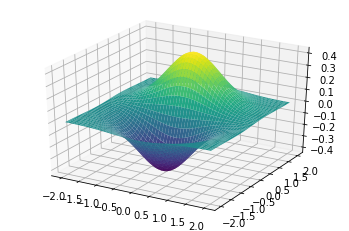

In [10]:
Z=np.reshape(fhat,(Nx//2,Ny//2));
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xd1, yd1, Z, rstride=1,
                       cstride=1, cmap='viridis',edgecolor='none')

## Error Analysis

In [9]:
E=max(abs(fhat-f(xhat,yhat)))
print(E)

8.930209072222084e-10
